In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("SMSSpamCollection" , sep="\t" , names=['label' , 'messege'])
dataset

,label,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
dataset.isnull().sum()

label      0
messege    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   messege  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label,messege
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset['label'] = dataset['label'].map({"spam":0 , "ham":1})

In [7]:
dataset

,label,messege
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'count')

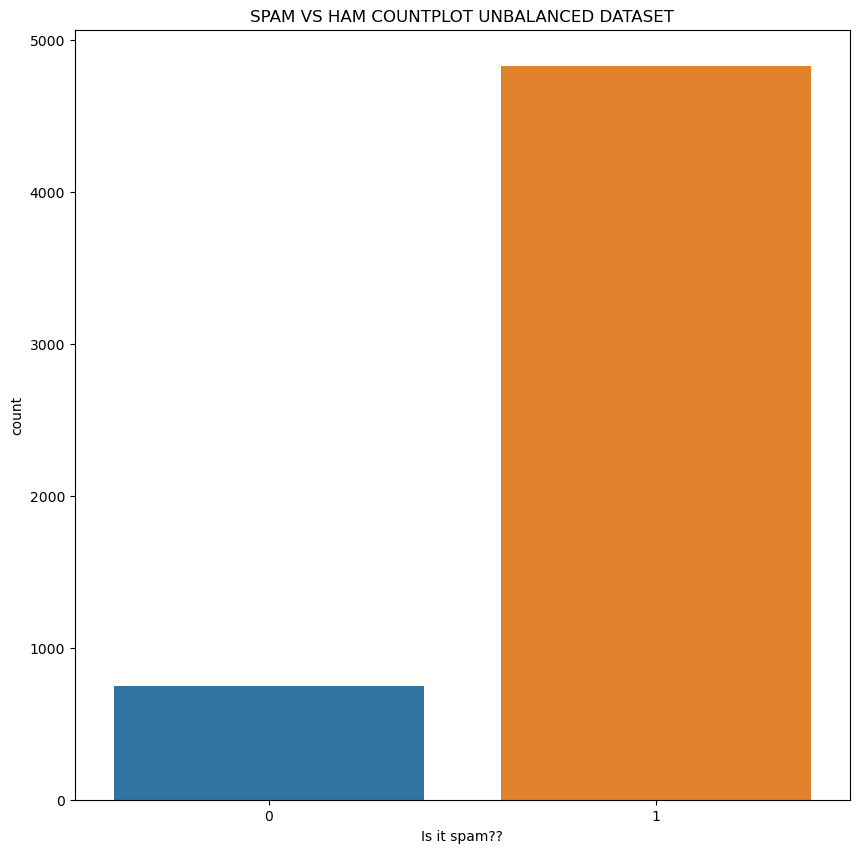

In [9]:
plt.figure(figsize=(10,10))
g = sns.countplot(x='label' , data=dataset)
p = plt.title("SPAM VS HAM COUNTPLOT UNBALANCED DATASET")
plt.xlabel("Is it spam??")
plt.ylabel("count")

# handaling the imbalance dataset using oversampling

In [10]:
only_spam = dataset[dataset['label']==0]
only_spam

,label,messege
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
5,0,FreeMsg Hey there darling it's been 3 week's n...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...
11,0,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,0,Had your contract mobile 11 Mnths? Latest Moto...
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...


In [11]:
len(dataset) - len(only_spam)

4825

In [12]:
(dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0]

6.459170013386881

In [13]:
for i in range(6):
    dataset = pd.concat([dataset , only_spam])
dataset.shape

(10054, 2)

Text(0, 0.5, 'count')

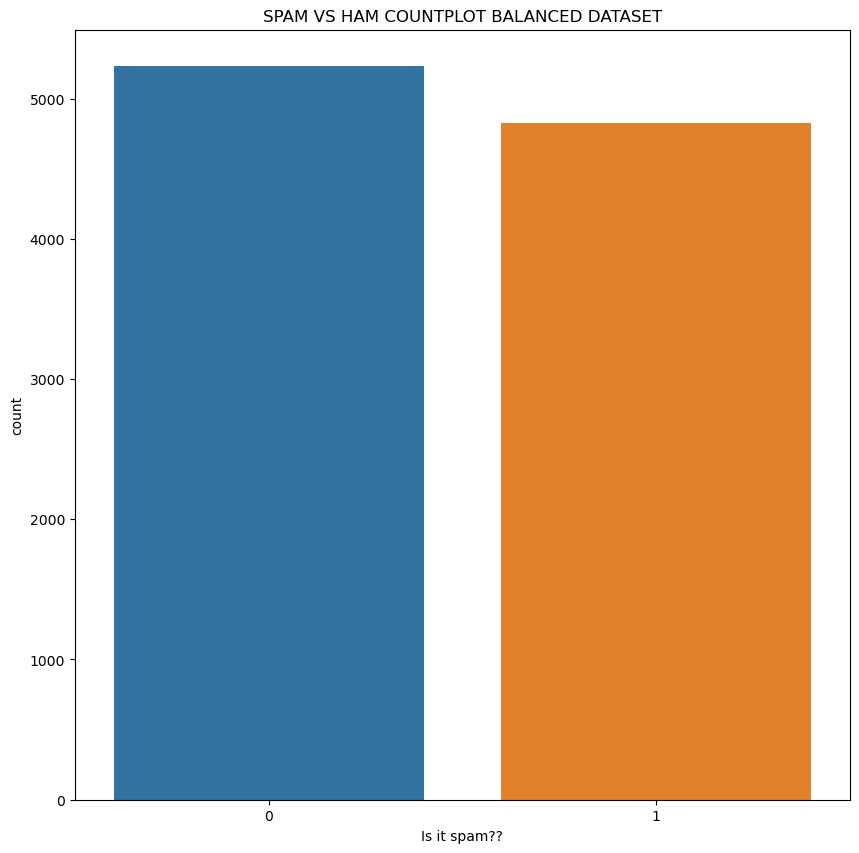

In [14]:
plt.figure(figsize=(10,10))
g = sns.countplot(x='label' , data=dataset)
p = plt.title("SPAM VS HAM COUNTPLOT BALANCED DATASET")
plt.xlabel("Is it spam??")
plt.ylabel("count")

# creating new feature

In [15]:
dataset['word_count'] = dataset['messege'].apply(lambda x: len(x.split()))
dataset

,label,messege,word_count
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,0,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...,28


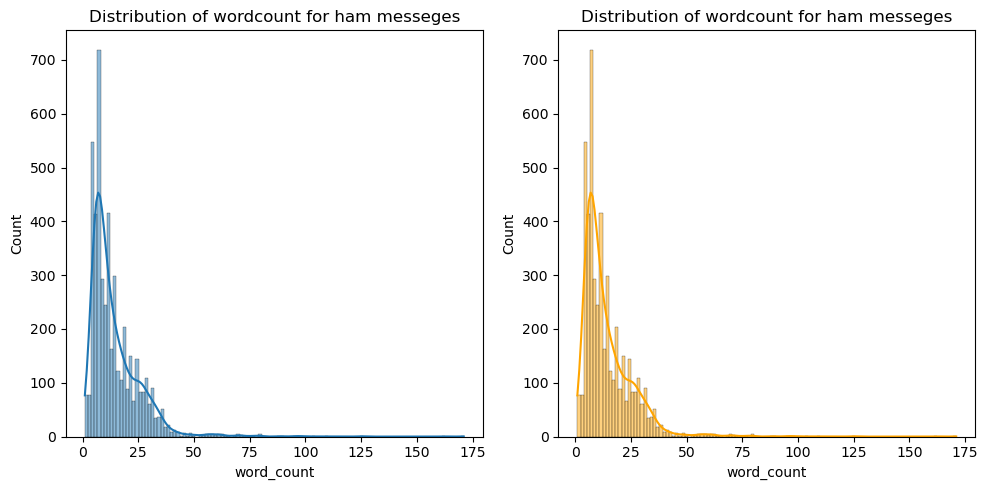

In [16]:
plt.figure(figsize = (10,5))

#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['label']==1].word_count , kde=True)
p = plt.title("Distribution of wordcount for ham messeges")

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['label']==1].word_count , color='orange' , kde=True)
p = plt.title("Distribution of wordcount for ham messeges")

plt.tight_layout()
plt.show()


In [17]:
def currency_symbol(data):
    currency_symbols = ['£','₹','¥','€','$']
    for i in currency_symbols:
        if i in data: return 1
    return 0

In [18]:
dataset['contain_currency_symbol'] = dataset['messege'].apply(currency_symbol)
dataset

,label,messege,word_count,contain_currency_symbol
0,1,"Go until jurong point, crazy.. Available only ...",20,0
1,1,Ok lar... Joking wif u oni...,6,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,1,U dun say so early hor... U c already then say...,11,0
4,1,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,0,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


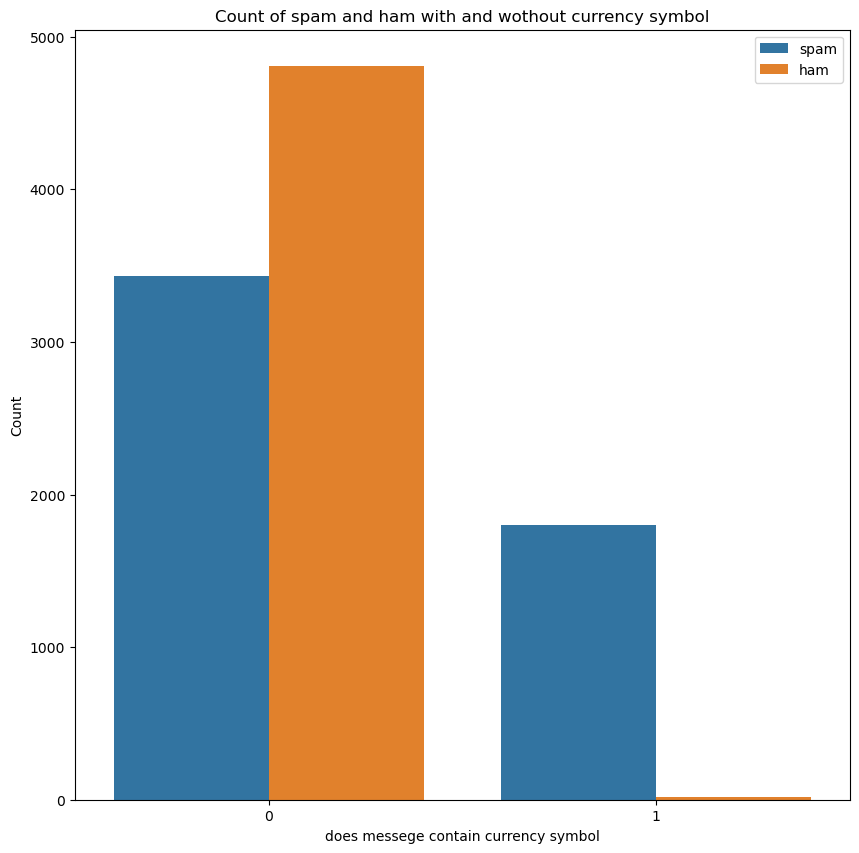

In [19]:
plt.figure(figsize=(10,10))
g = sns.countplot(x='contain_currency_symbol' , data=dataset , hue='label')
p = plt.title("Count of spam and ham with and wothout currency symbol")
p = plt.xlabel("does messege contain currency symbol")
p = plt.ylabel("Count")
p = plt.legend(labels = ['spam' , 'ham']) 
plt.show()

In [20]:
def check_numbers(data):
    for i in data:
        if 48 <= ord(i) <=57: return 1
    return 0

In [21]:
dataset['contain_number'] = dataset['messege'].apply(check_numbers)
dataset

,label,messege,word_count,contain_currency_symbol,contain_number
0,1,"Go until jurong point, crazy.. Available only ...",20,0,0
1,1,Ok lar... Joking wif u oni...,6,0,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,1,U dun say so early hor... U c already then say...,11,0,0
4,1,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,0,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


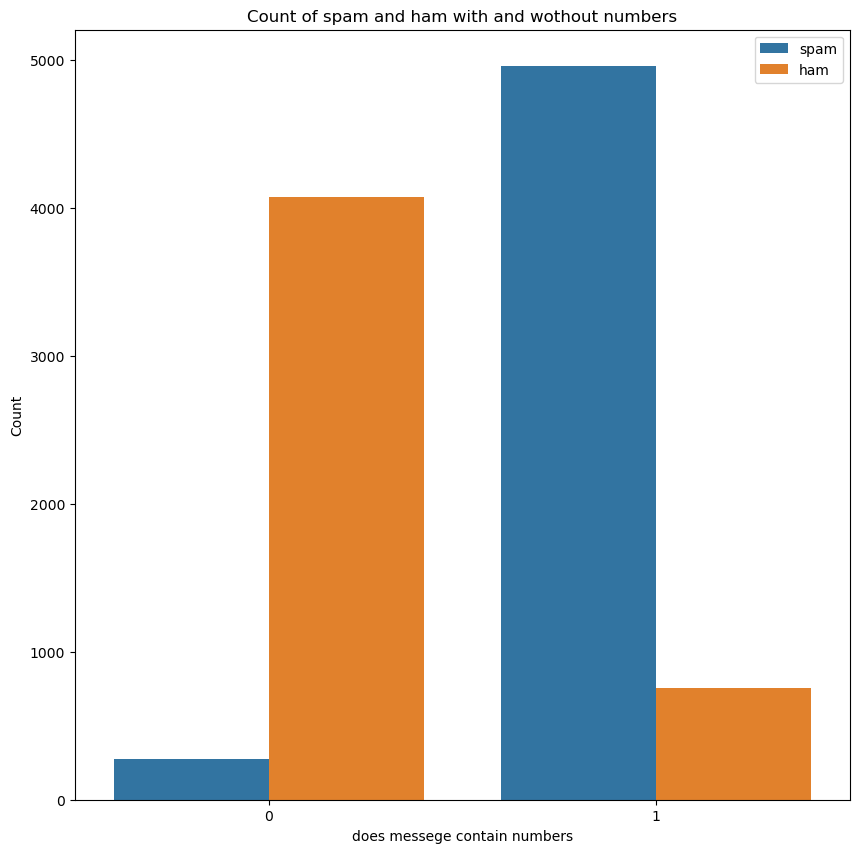

In [22]:
plt.figure(figsize=(10,10))
g = sns.countplot(x='contain_number' , data=dataset , hue='label')
p = plt.title("Count of spam and ham with and wothout numbers")
p = plt.xlabel("does messege contain numbers")
p = plt.ylabel("Count")
p = plt.legend(labels = ['spam' , 'ham']) 
plt.show()

# DATA CLEANING

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
corpus = list()
wnl = WordNetLemmatizer()

for sms in list(dataset.messege):
    messege = re.sub(pattern = '^a-zA-Z' , repl=" " , string=sms) #filtering all the special charactors and numbers
    messege = messege.lower()
    messege = messege.split()
    messege = [word for word in messege if word not in set(stopwords.words('english'))]
    messege = [wnl.lemmatize(word) for word in messege]
    messege = " ".join(messege)
    
    corpus.append(messege)

In [25]:
corpus

['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor... u c already say...',
 'nah think go usf, life around though',
 "freemsg hey darling 3 week's word back! i'd like fun still? tb ok! xxx std chgs send, £1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'melle melle (oru minnaminunginte nurungu vettam)' set callertune callers. press *9 copy friend callertune",
 'winner!! valued network customer selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobile 11 month more? u r entitled update latest colour mobile camera free! call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.",
 'six chance win ca

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [27]:
x = pd.DataFrame(vectors , columns=feature_names)
y = dataset['label']


In [28]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=30)

# MODEL 1 NAIVE BAYES MODEL

In [30]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
cv = cross_val_score(model1 , x, y , scoring='f1' , cv=10)
print(cv)

[0.9801877  0.98426023 0.98439126 0.98442368 0.99168399 0.98962656
 0.98117155 0.98117155 0.97997893 0.98647242]


In [31]:
print(cv.mean() , cv.std())

0.9843367855160725 0.0037786742723651275


In [32]:
model1.fit(x_train , y_train)
y_pred = model1.predict(x_test)

In [33]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1629
           1       0.99      0.98      0.98      1388

    accuracy                           0.98      3017
   macro avg       0.98      0.98      0.98      3017
weighted avg       0.98      0.98      0.98      3017



Text(33.22222222222222, 0.5, 'Predicted value')

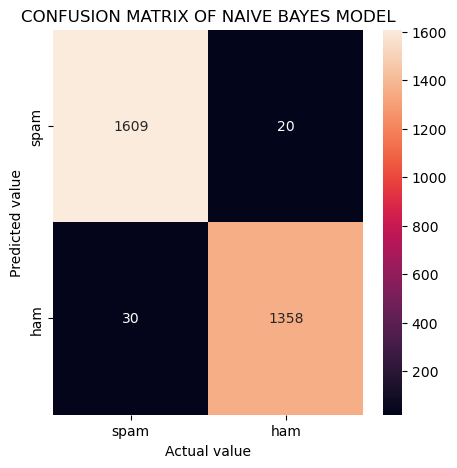

In [34]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(5,5))
axis_labels = ['spam' , 'ham']
g = sns.heatmap(data=cm , annot=True , xticklabels=axis_labels , yticklabels=axis_labels , fmt='g')
plt.title("CONFUSION MATRIX OF NAIVE BAYES MODEL")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")


# MODEL 2 DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cv = cross_val_score(model2 , x, y , scoring='f1' , cv=10)

In [36]:
print(cv.mean() , cv.std())

0.9833447042884096 0.002952414205627444


In [44]:
model2.fit(x_train , y_train)
y_pred1 = model2.predict(x_test)

In [45]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1629
           1       1.00      0.96      0.98      1388

    accuracy                           0.98      3017
   macro avg       0.98      0.98      0.98      3017
weighted avg       0.98      0.98      0.98      3017



Text(33.22222222222222, 0.5, 'Predicted value')

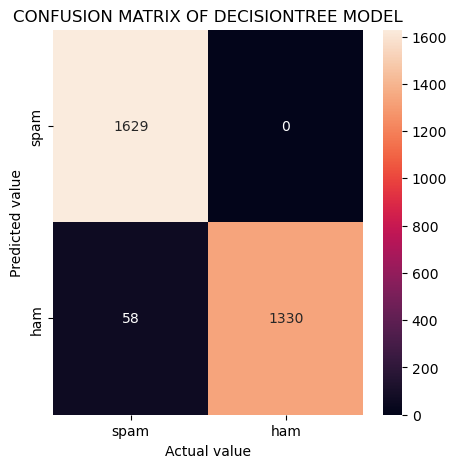

In [46]:
cm1 = confusion_matrix(y_test , y_pred1)

plt.figure(figsize=(5,5))
axis_labels = ['spam' , 'ham']
g = sns.heatmap(data=cm1 , annot=True , xticklabels=axis_labels , yticklabels=axis_labels , fmt='g')
plt.title("CONFUSION MATRIX OF DECISIONTREE MODEL")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")


In [47]:
def predict_spam(sms):
    messege = re.sub(pattern = '^a-zA-Z' , repl=" " , string=sms) #filtering all the special charactors and numbers
    messege = messege.lower()
    messege = messege.split()
    messege = [word for word in messege if word not in set(stopwords.words('english'))]
    messege = [wnl.lemmatize(word) for word in messege]
    messege = " ".join(messege)
    
    temp = tfidf.transform([messege]).toarray()
    return model1.predict(temp)